***INTRODUCCIÓN A OPTIMIZACIÓN CON PYTHON***
Lo básico en un problema de optimización es tener una función objetivo y un optimizador.

In [2]:
# cargamos paquestes básicos y optimize
import numpy as np
import matplotlib.pyplot as pl
import scipy.optimize as opt

In [3]:
obj = np.poly1d([3.4, 2.1, 0.5]) # generamos polynomio de grado 2
# exactamente lo mismo que
# def obj(x):
#    return 3.4*x**2+2.1*x+0.5
print obj

     2
3.4 x + 2.1 x + 0.5


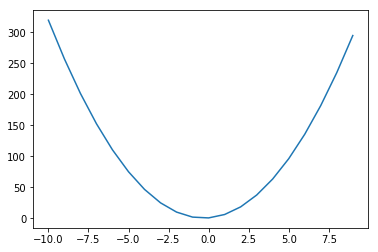

In [4]:
x=np.arange(-10,10)
y=obj(x)
pl.plot(x,y)


* optimize with fmin, fmin uses Nelder-Mead algorithm and does not need derivatives information (see help(opt.fmin) for details)

In [6]:
xopt= opt.fmin(obj, [3])
print xopt


Optimization terminated successfully.
         Current function value: 0.175735
         Iterations: 19
         Function evaluations: 38
[-0.30878906]


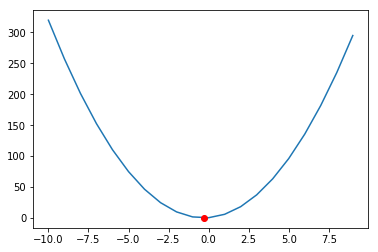

In [7]:
# hacemos plot de función y del mínimo
pl.plot(x,y)
pl.plot(xopt,obj(xopt),'ro')

Resolvemos la misma función con opt.minimize

In [8]:
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [9]:
res=opt.minimize(obj, [3], method=None) # por defecto BFGS method
print res

      fun: 0.17573529411764777
 hess_inv: array([[0.14705882]])
      jac: array([1.49011612e-07])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([-0.30882351])


Le ponemos cotas

In [11]:
res=opt.minimize(obj, 1, bounds=((-10,-5),))# si tiene bounds por defecto L-BFGS method
print res


      fun: array([75.])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-31.89999944])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 2
      nit: 0
   status: 0
  success: True
        x: array([-5.])


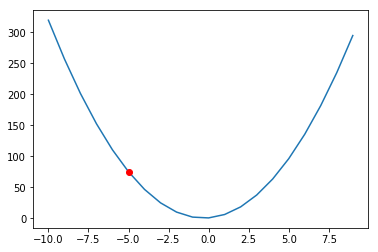

In [12]:
pl.plot(x,y)
pl.plot(res.x,obj(res.x),'ro')